In [10]:
import os
import pandas as pd
import time
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [13]:
folder_path = r"C:\Users\mirwa\Downloads\partition1_instances\partition1_instances\partition1\FL"

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
dfs_m_class = []
dfs_x_class = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, delimiter='\t')
    if file.startswith('M'):
        dfs_m_class.append(df)
    elif file.startswith('X'):
        dfs_x_class.append(df)
m_class_df = pd.concat(dfs_m_class, ignore_index=True)
x_class_df = pd.concat(dfs_x_class, ignore_index=True)

In [14]:
m_class_df.head()

,Timestamp,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,...,BFLARE_LABEL_LOC,CFLARE_LOC,CFLARE_LABEL_LOC,MFLARE_LOC,MFLARE_LABEL_LOC,XFLARE_LOC,XFLARE_LABEL_LOC,XR_MAX,XR_QUAL,IS_TMFI
0,2011-02-16 23:00:00,1315.120642,1.842497e+10,3.016901e+23,2.454062e+13,230.569941,4.836862e+12,1.605071e+22,-5.947877e+24,9573.868918,...,None,0.0,None,0.0,None,0.0,None,0.000001,12,True
1,2011-02-16 23:12:00,1295.291384,1.843622e+10,3.024088e+23,2.417370e+13,224.991299,4.397979e+12,1.599257e+22,-5.906557e+24,9722.050738,...,None,0.0,None,0.0,None,0.0,None,0.000002,12,True
2,2011-02-16 23:24:00,1291.072348,1.843172e+10,3.019023e+23,2.432924e+13,220.760494,4.717316e+12,1.592544e+22,-5.905641e+24,9781.776276,...,None,0.0,None,0.0,None,0.0,None,0.000002,12,True
3,2011-02-16 23:36:00,1276.641067,1.844119e+10,2.997206e+23,2.420092e+13,216.071262,4.158079e+12,1.596506e+22,-6.021066e+24,9729.093325,...,None,0.0,None,0.0,None,0.0,None,0.000001,12,True
4,2011-02-16 23:48:00,1290.970251,1.841171e+10,2.985437e+23,2.434502e+13,200.638061,3.169052e+12,1.585948e+22,-6.003582e+24,9822.149411,...,None,0.0,None,0.0,None,0.0,None,0.000001,12,True


In [15]:
x_class_df.head()

,Timestamp,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,...,BFLARE_LABEL_LOC,CFLARE_LOC,CFLARE_LABEL_LOC,MFLARE_LOC,MFLARE_LABEL_LOC,XFLARE_LOC,XFLARE_LABEL_LOC,XR_MAX,XR_QUAL,IS_TMFI
0,2012-03-03 18:24:00,2256.270574,4.728385e+10,9.054615e+23,3.118552e+13,910.663169,3.106897e+13,3.571410e+22,-1.405072e+25,16210.194056,...,None,0.0,None,0.0,None,0.0,None,9.473700e-07,12,True
1,2012-03-03 18:36:00,2386.140839,4.687267e+10,9.316569e+23,3.316874e+13,610.960033,1.717212e+13,3.539096e+22,-1.418053e+25,16738.856935,...,None,0.0,None,0.0,None,0.0,None,1.103500e-06,8,True
2,2012-03-03 18:48:00,2282.973719,4.743443e+10,9.295848e+23,3.113805e+13,712.927545,2.458635e+13,3.558759e+22,-1.341173e+25,16711.995305,...,None,0.0,None,0.0,None,0.0,None,-9.999900e+04,0,False
3,2012-03-03 19:00:00,2252.357101,4.745461e+10,9.034011e+23,3.105597e+13,892.590993,3.043194e+13,3.582414e+22,-1.429655e+25,16215.717571,...,None,0.0,None,0.0,None,0.0,None,-9.999900e+04,0,False
4,2012-03-03 19:12:00,2380.909035,4.701078e+10,9.040264e+23,3.251565e+13,636.747399,1.859471e+13,3.574634e+22,-1.517342e+25,16500.704102,...,None,0.0,None,0.0,None,0.0,None,1.772400e-06,1,False


In [49]:
#m_class_df.describe()
#m_class_df.info()
x_class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         9900 non-null   object 
 1   TOTUSJH           9873 non-null   float64
 2   TOTBSQ            9873 non-null   float64
 3   TOTPOT            9873 non-null   float64
 4   TOTUSJZ           9873 non-null   float64
 5   ABSNJZH           9873 non-null   float64
 6   SAVNCPP           9873 non-null   float64
 7   USFLUX            9873 non-null   float64
 8   TOTFZ             9873 non-null   float64
 9   MEANPOT           9873 non-null   float64
 10  EPSZ              9873 non-null   float64
 11  MEANSHR           9873 non-null   float64
 12  SHRGT45           9873 non-null   float64
 13  MEANGAM           9873 non-null   float64
 14  MEANGBT           9873 non-null   float64
 15  MEANGBZ           9873 non-null   float64
 16  MEANGBH           9873 non-null   float64


In [21]:
m_class_df.isnull().sum()
m_class_df = m_class_df.dropna()

In [22]:
m_class_df.isnull().sum()

Timestamp           0
TOTUSJH             0
TOTBSQ              0
TOTPOT              0
TOTUSJZ             0
ABSNJZH             0
SAVNCPP             0
USFLUX              0
TOTFZ               0
MEANPOT             0
EPSZ                0
MEANSHR             0
SHRGT45             0
MEANGAM             0
MEANGBT             0
MEANGBZ             0
MEANGBH             0
MEANJZH             0
TOTFY               0
MEANJZD             0
MEANALP             0
TOTFX               0
EPSY                0
EPSX                0
R_VALUE             0
CRVAL1              0
CRLN_OBS            0
CRLT_OBS            0
CRVAL2              0
HC_ANGLE            0
SPEI                0
LAT_MIN             0
LON_MIN             0
LAT_MAX             0
LON_MAX             0
QUALITY             0
BFLARE              0
BFLARE_LABEL        0
CFLARE              0
CFLARE_LABEL        0
MFLARE              0
MFLARE_LABEL        0
XFLARE              0
XFLARE_LABEL        0
BFLARE_LOC          0
BFLARE_LAB

In [42]:
signal = m_class_df['TOTUSJH'].values
signal_2 = x_class_df['TOTUSJH'].values
print(signal)

[1315.1206423  1295.29138388 1291.07234782 ... 2940.03298861 2949.44621009
 3052.86988609]


In [43]:
def wavelet_decomposition(signal):
    wavelet = 'db4'
    level = 5
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    reconstructed_signal = pywt.waverec(coeffs, wavelet)
    return coeffs, reconstructed_signal

In [54]:
def scalability_study(signal, step=6060):
    results = []
    input_sizes = range(step, len(signal) + 1, step)
    for size in input_sizes:
        sub_signal = signal[:size]
        start_time = time.time()
        result = wavelet_decomposition(sub_signal)
        execution_time = time.time() - start_time
        results.append({
            'input_size': size,
            'result': result,
            'execution_time': execution_time
        })

    return results

Input Size: 6060, Execution Time: 0.001012 seconds
Input Size: 12120, Execution Time: 0.000509 seconds
Input Size: 18180, Execution Time: 0.000000 seconds
Input Size: 24240, Execution Time: 0.000000 seconds
Input Size: 30300, Execution Time: 0.000000 seconds
Input Size: 36360, Execution Time: 0.000000 seconds
Input Size: 42420, Execution Time: 0.000000 seconds
Input Size: 48480, Execution Time: 0.000000 seconds
Input Size: 54540, Execution Time: 0.000000 seconds
Input Size: 60600, Execution Time: 0.005587 seconds


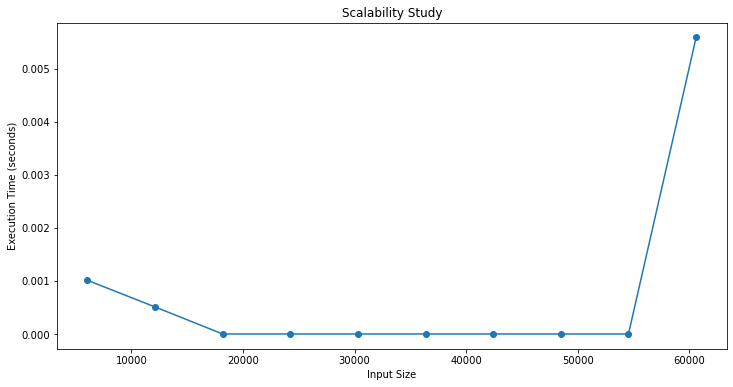

In [80]:
if __name__ == "__main__":
    signal = m_class_df['TOTUSJH'].values
    scalability_results = scalability_study(signal)
    for result in scalability_results:
        print(f"Input Size: {result['input_size']}, Execution Time: {result['execution_time']:.6f} seconds")
    input_sizes = [result['input_size'] for result in scalability_results]
    execution_times = [result['execution_time'] for result in scalability_results]
    plt.figure(figsize=(12, 6))

    plt.plot(input_sizes, execution_times, marker='o')
    plt.title('Scalability Study')
    plt.xlabel('Input Size')
    plt.ylabel('Execution Time (seconds)')
    plt.show()

In [81]:
def scalability_study_2(signal, step=960):
    results = []
    input_sizes = range(step, len(signal) + 1, step)
    for size in input_sizes:
        sub_signal = signal[:size]
        start_time = time.time()
        result = wavelet_decomposition(sub_signal)
        execution_time = time.time() - start_time
        results.append({
            'input_size': size,
            'result': result,
            'execution_time': execution_time
        })

    return results

Input Size: 960, Execution Time: 0.000689 seconds
Input Size: 1920, Execution Time: 0.000000 seconds
Input Size: 2880, Execution Time: 0.000000 seconds
Input Size: 3840, Execution Time: 0.000000 seconds
Input Size: 4800, Execution Time: 0.000000 seconds
Input Size: 5760, Execution Time: 0.000000 seconds
Input Size: 6720, Execution Time: 0.001498 seconds
Input Size: 7680, Execution Time: 0.000000 seconds
Input Size: 8640, Execution Time: 0.000000 seconds
Input Size: 9600, Execution Time: 0.000000 seconds


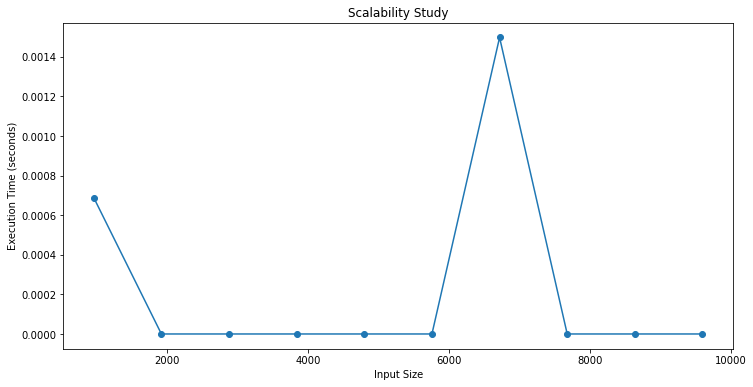

In [96]:
if __name__ == "__main__":
    signal_2 = x_class_df['TOTUSJH'].values
    scalability_results = scalability_study_2(signal_2)
    for result in scalability_results:
        print(f"Input Size: {result['input_size']}, Execution Time: {result['execution_time']:.6f} seconds")
    input_sizes = [result['input_size'] for result in scalability_results]
    execution_times = [result['execution_time'] for result in scalability_results]
    plt.figure(figsize=(12, 6))

    plt.plot(input_sizes, execution_times, marker='o')
    plt.title('Scalability Study')
    plt.xlabel('Input Size')
    plt.ylabel('Execution Time (seconds)')
    plt.show()

In [99]:
print(signal[0:6060])
print(signal[6060:12120])
print(signal[12120:18180])
print(signal[18180:24240])
print(signal[24240:30300])
print(signal[30300:36360])
print(signal[36360:42420])
print(signal[42420:48480])
print(signal[48480:54540])
print(signal[54540:60600])






[1315.1206423  1295.29138388 1291.07234782 ...  853.57387662  839.87740834
  856.35553712]
[ 855.32231195  848.56757261  842.96212542 ... 1973.72444367 1947.0811086
 1947.72167084]
[1900.87626379 1879.63347361 1851.63581039 ... 3609.46851528 3615.597335
 3692.53329138]
[3673.65025232 3648.958129   3614.10162553 ... 5626.97193646 5676.97573685
 5672.64304883]
[5656.68525599 5601.46536518 5544.73663559 ... 4862.10570681 4843.72345651
 4885.72597094]
[4861.01145248 4863.39592186 5431.07494923 ... 1668.87336193 1634.78752328
 1608.47183081]
[1595.64915641 1611.48288856 1610.35554921 ... 3748.51779786 3743.08261058
 3733.75379338]
[3731.67061333 3687.76487499 3690.27035189 ... 2771.3455646  2753.30263391
 2741.81668734]
[2727.65401374 2712.01411513 2743.95117123 ... 1802.16976477 1827.22078742
 1836.61782616]
[1830.06910795 1861.75222619 1916.57669718 ... 1490.44413777 1494.73858997
 1492.35507635]


In [1]:
'''print(signal_2[0:960])
print(signal_2[960:1920])
print(signal_2[1920:2880])
print(signal_2[2880:3840])
print(signal_2[3840:4800])
print(signal_2[4800:5760])
print(signal_2[5760:6720])
print(signal_2[6720:7680])
print(signal_2[7680:8640])
print(signal_2[8640:9600])'''

'print(signal_2[0:960])\nprint(signal_2[960:1920])\nprint(signal_2[1920:2880])\nprint(signal_2[2880:3840])\nprint(signal_2[3840:4800])\nprint(signal_2[4800:5760])\nprint(signal_2[5760:6720])\nprint(signal_2[6720:7680])\nprint(signal_2[7680:8640])\nprint(signal_2[8640:9600])'

In [38]:
import cProfile

if __name__ == "__main__":
    signal = m_class_df['TOTUSJH'].values
    cProfile.run('scalability_results = scalability_study(signal)', sort='cumulative')

         2127 function calls in 0.033 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.033    0.033 {built-in method builtins.exec}
        1    0.000    0.000    0.033    0.033 <string>:1(<module>)
        1    0.000    0.000    0.032    0.032 3320796946.py:1(scalability_study)
       10    0.000    0.000    0.032    0.003 2530373735.py:1(wavelet_decomposition)
       10    0.001    0.000    0.016    0.002 _multilevel.py:49(wavedec)
       10    0.001    0.000    0.015    0.002 _multilevel.py:112(waverec)
       50    0.001    0.000    0.014    0.000 _dwt.py:191(idwt)
       50    0.013    0.000    0.014    0.000 _dwt.py:120(dwt)
       50    0.011    0.000    0.011    0.000 {built-in method pywt._extensions._dwt.idwt_single}
      160    0.000    0.000    0.002    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
      110    0.000    0.000    0.002    0.000 _u

In [35]:
multiples_of_60 = [60 * i for i in range(1, 1084)] 
print(multiples_of_60)

[60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1260, 1320, 1380, 1440, 1500, 1560, 1620, 1680, 1740, 1800, 1860, 1920, 1980, 2040, 2100, 2160, 2220, 2280, 2340, 2400, 2460, 2520, 2580, 2640, 2700, 2760, 2820, 2880, 2940, 3000, 3060, 3120, 3180, 3240, 3300, 3360, 3420, 3480, 3540, 3600, 3660, 3720, 3780, 3840, 3900, 3960, 4020, 4080, 4140, 4200, 4260, 4320, 4380, 4440, 4500, 4560, 4620, 4680, 4740, 4800, 4860, 4920, 4980, 5040, 5100, 5160, 5220, 5280, 5340, 5400, 5460, 5520, 5580, 5640, 5700, 5760, 5820, 5880, 5940, 6000, 6060, 6120, 6180, 6240, 6300, 6360, 6420, 6480, 6540, 6600, 6660, 6720, 6780, 6840, 6900, 6960, 7020, 7080, 7140, 7200, 7260, 7320, 7380, 7440, 7500, 7560, 7620, 7680, 7740, 7800, 7860, 7920, 7980, 8040, 8100, 8160, 8220, 8280, 8340, 8400, 8460, 8520, 8580, 8640, 8700, 8760, 8820, 8880, 8940, 9000, 9060, 9120, 9180, 9240, 9300, 9360, 9420, 9480, 9540, 9600, 9660, 9720, 9780, 9840, 9900, 9960, 10020, 10080, 10140,